## Bank Loan Repayment

### Tasks
- Feature Reduction
- Classification

### Dataset

https://www.kaggle.com/kirankarri/kiran-loans
https://www.lendingclub.com/info/download-data.action

### Description

From: https://www.kaggle.com/indra90/predicting-loan-repayment

In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender profits from the interest. However, if the borrower is unable to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan.

To address this problem, we will use publicly available data from LendingClub.com, a website that connects borrowers and investors over the Internet. This dataset represents 9,578 3-year loans that were funded through the LendingClub.com platform between May 2007 and February 2010. The binary dependent variable not_fully_paid indicates that the loan was not paid back in full (the borrower either defaulted or the loan was "charged off," meaning the borrower was deemed unlikely to ever pay it back).

#### Dependent Variable - 'not.fully.paid'

A binary variable indicating that the loan was not paid back in full, i.e, (the borrower either defaulted or the loan was "charged off," meaning the borrower was deemed unlikely to ever pay it back).

#### Independent Variables
  1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
  2. purpose: The purpose of the loan (takes values “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other”).
  3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
  4. installment: The monthly installments ($) owed by the borrower if the loan is funded.
  5. annualincome: the self-reported annual income of the borrower.
  6. log.annual.inc: The natural log of the self-reported annual income of the borrower.
  7. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
  8. fico: The FICO credit score of the borrower.
  9. days.with.cr.line: The number of days the borrower has had a credit line.
  10. revol.bal: The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).
  11. revol.util: The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).
  12. inq.last.6mths: The borrower’s number of inquiries by creditors in the last 6 months.
  13. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
  14. pub.rec: The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('../../data/loan-repayment/loans.csv')

df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [11]:
# select initial data columns
target = 'not.fully.paid'
features = df.columns[df.columns != target]

## Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9549 non-null float64
revol.bal            9578 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9549 non-null float64
delinq.2yrs          9549 non-null float64
pub.rec              9549 non-null float64
not.fully.paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [7]:
# preview the NaN values
df[df.isna().values]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
781,1,all_other,0.1134,98.70,10.530495,7.72,677,1680.000000,0,NaN,1.0,0.0,0.0,1
803,1,educational,0.1103,52.41,10.532096,15.84,682,1829.958333,0,NaN,0.0,0.0,0.0,0
839,1,debt_consolidation,0.1134,263.20,10.714418,8.75,682,2490.000000,0,NaN,1.0,1.0,0.0,1
857,1,debt_consolidation,0.1229,23.35,9.852194,12.38,662,1199.958333,0,NaN,1.0,0.0,0.0,0
1213,1,major_purchase,0.1064,182.39,11.264464,4.26,697,4140.958333,0,NaN,0.0,0.0,1.0,0
1280,1,credit_card,0.1633,264.91,10.819778,10.80,667,5249.958333,0,NaN,0.0,0.0,0.0,1
1553,1,all_other,0.1557,314.51,10.596535,0.00,687,2940.041667,0,NaN,1.0,0.0,0.0,0
1782,1,educational,0.1695,97.98,8.342840,0.00,687,1238.041667,0,NaN,0.0,0.0,0.0,0
1927,1,all_other,0.1379,170.38,10.714418,6.00,722,5280.041667,0,NaN,1.0,0.0,0.0,0
2008,1,all_other,0.1316,405.25,11.350407,12.01,752,3749.041667,0,NaN,0.0,0.0,0.0,0


In [10]:
# look at how many NaN values there are for each column with NaN values
for f in features:
    nan_count = df[f].isna().sum()
    if nan_count > 0:
        print(f, 'nan count:', nan_count, 'unique value count:', len(df[f].unique()))

log.annual.inc nan count: 4 unique value count: 1988
days.with.cr.line nan count: 29 unique value count: 2688
revol.util nan count: 62 unique value count: 1036
inq.last.6mths nan count: 29 unique value count: 29
delinq.2yrs nan count: 29 unique value count: 12
pub.rec nan count: 29 unique value count: 7


### log.annual.inc

- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- nan count: 4 unique value count: 1988
- Recommendation: hard to interpolate, let's drop those rows since NaN count is low

### days.with.cr.line

- days.with.cr.line: The number of days the borrower has had a credit line.
- nan count: 29 unique value count: 2688
- Recommendation: inspect the NaN values to see if they map to 0 days

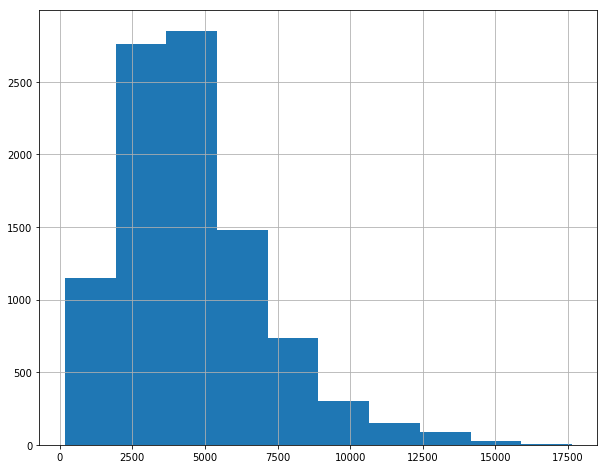

In [17]:
# see if there are zeros
fig, ax = plt.subplots(figsize=(10, 8))
df['days.with.cr.line'].hist(ax=ax)

In [ ]:
# no zeros, fill the NaN with 0

